In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [2]:
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.utils import np_utils
import itertools
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [3]:
# Loaing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print('X_train shape:',X_train.shape,'X_test shape:',X_test.shape)

X_train shape: (60000, 28, 28) X_test shape: (10000, 28, 28)


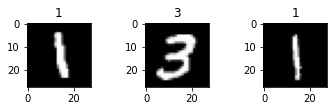

In [5]:
# Data Visualization
for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])

0    10
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


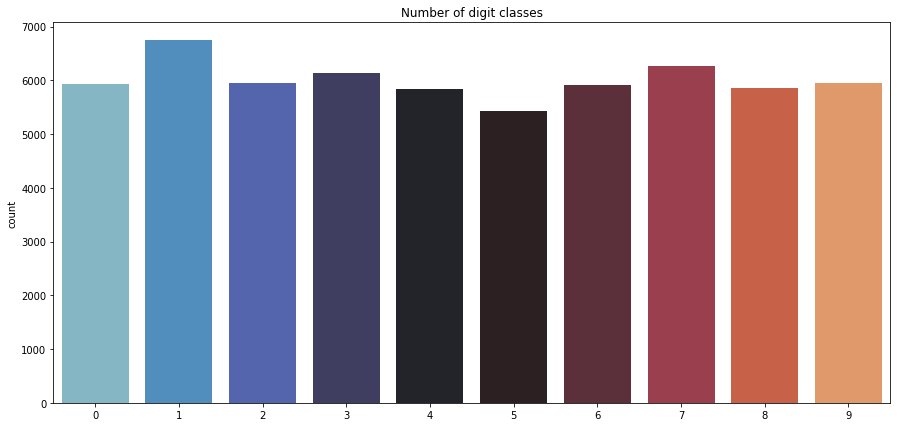

In [6]:
print(pd.DataFrame(y_test).nunique())

# visualize number of digits classes
plt.figure(figsize=(15,7))
plt.title("Number of digit classes")
sns.countplot(y_train, palette="icefire")

In [7]:
# Reshape
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


In [8]:
#Normalize the data
X_train = X_train.astype("float32")/255
X_test= X_test.astype("float32")/255

In [9]:
#Label Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test,num_classes=10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
#Define the model

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# Fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))



In [11]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [12]:
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=["accuracy"])

In [13]:
epochs = 20  # for better result increase the epochs
batch_size = 250

In [14]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [15]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              steps_per_epoch=X_train.shape[0] // batch_size,verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
240/240 - 51s - loss: 0.4541 - accuracy: 0.8526 - val_loss: 0.0591 - val_accuracy: 0.9798
Epoch 2/20
240/240 - 20s - loss: 0.1229 - accuracy: 0.9628 - val_loss: 0.0310 - val_accuracy: 0.9895
Epoch 3/20
240/240 - 20s - loss: 0.0842 - accuracy: 0.9747 - val_loss: 0.0315 - val_accuracy: 0.9902
Epoch 4/20
240/240 - 20s - loss: 0.0683 - accuracy: 0.9795 - val_loss: 0.0248 - val_accuracy: 0.9919
Epoch 5/20
240/240 - 20s - loss: 0.0610 - accuracy: 0.9819 - val_loss: 0.0212 - val_accuracy: 0.9929
Epoch 6/20
240/240 - 20s - loss: 0.0544 - accuracy: 0.9838 - val_loss: 0.0158 - val_accuracy: 0.9948
Epoch 7/20
240/240 - 20s - loss: 0.0482 - accuracy: 0.9860 - val_loss: 0.0150 - val_accuracy: 0.9944
Epoch 8/20
240/240 - 20s - loss: 0.0458 - accuracy: 0.9863 - val_loss: 0.0165 - val_accuracy: 0.9954
Epoch 9/20
240/240 - 20s - loss: 0.0442 - accuracy: 0.9871 - val_loss: 0.0148 - val_accuracy: 0.9946
Epoch 10/20
240/240 - 20s - loss: 0.0420 - accuracy: 0.9876 - val_loss: 0.0117 - val_accura

In [16]:
final_loss, final_acc = model.evaluate(X_test, y_test, verbose=2)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

313/313 - 1s - loss: 0.0140 - accuracy: 0.9959
Final loss: 0.0140, final accuracy: 0.9959


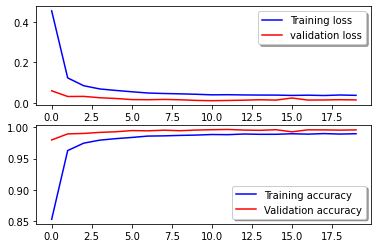

In [17]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

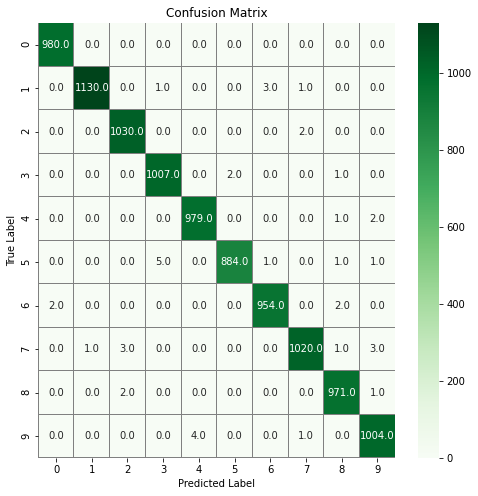

In [18]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()